# Predição de Valor de imóvel com *Regressão Linear*

## Quando eu uso uma regressão?

Quando você está trabalhando com variáveis contínuas. 

**Exemplo**: Você sabe o valor da sua casa? Como você construiria um modelo para prever o valor dos imóveis da sua cidade?

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import numpy as np
%matplotlib inline 

Vamos usar o [Boston Housing Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) para prever valores de imóveis em Boston 

Primeiro carregue o dataset. Vamos dar uma roubada e usar o dataset da biblioteca do sklearn.

In [40]:
from sklearn.datasets import load_boston
boston = load_boston()

In [41]:
#print(boston)

O dataset vem em formato de dicionário - Precisamos transformar ele em DataFrame. Mas, antes vamos ver as descrições das variáveis. 

Como vejo as chaves de um dicionário?

In [42]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Vamos verificar a chave que descreve como o dataset está estruturado. É a chave `DESCR`.

In [43]:
#print(boston.DESCR)

Transformar o dicionário em um dataframe:

Jeito 1 - Assim, não dá para ver os nomes dos atributos:

In [44]:
boston_data = pd.DataFrame(boston.data)
boston_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Jeito 2 - Com os nomes dos atributos

In [45]:
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [46]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Qual dessas variáveis parece ser a mais importante? Conseguimos fazer alguma coisa para testar como a nossa variável resposta se comporta com outras variáveis?

Primeiro precisamos colocar a variável resposta no dataset

In [47]:
boston_data['target'] = boston.target

In [48]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Vamos ver se fizemos tudo certinho verificando o tamanho do Dataframe.

In [49]:
boston_data.shape

(506, 14)

A descrição não estava mentido. Existem 506 registros e 14 colunas. Fizemos tudo certo até aqui

## Passo_1: Analise descritiva da base

Agora vamos escolher um atributo que acreditamos ser o mais relevante. E rodar uma regressão linear simples com esse atributo. Mas, como vamos escolher esse atributo entre os 13? A primeira coisa que podemos fazer é levantar algumas hipóteses.

Inicialmente vamos ver a descriçãode cada variável com o `describe`

In [50]:
boston_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Quais variáveis são categóricas? Quais variáveis são numéricas?

Por enquanto vamos trabalhar só com os atributos em negrito. Mais especificamente, neste primeiro momento, vamos ver o atributo `RM` - o número de quartos

**Attribute Information (in order)** 

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - ** RM       average number of rooms per dwelling**
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - ** PTRATIO  pupil-teacher ratio by town **
 - B       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 - ** LSTAT lower status of the population **
 - MEDV     Median value of owner-occupied homes in $1000's

## Passo_2: Ajustar um modelo de reg lin simples utilizando a variavel RM

Vamos testar a correlação dessa variável com o valor dos imóveis. <br>
Correlação de Pearson usando o método `corr` do pandas

In [51]:
boston_data.target.corr(boston_data.RM)

0.69535994707153903

Agora vamos testar fazer um preditor de valor de imóveis usando apenas o número de quartos

Precisamos separar o dataset em treino e teste e também pegar a variável resposta

In [52]:
Y = boston_data['target']
X = boston_data.RM.to_frame()

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [54]:
#Usando a biblioteca statsmodels
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train) #adiciona a cte a base de dados
X_test_1 = sm.add_constant(X_test) #adiciona a cte a base de dados
est = sm.OLS(Y_train, X_train_1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     335.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.28e-53
Time:                        19:28:28   Log-Likelihood:                -1176.1
No. Observations:                 354   AIC:                             2356.
Df Residuals:                     352   BIC:                             2364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6623      3.170    -10.935      0.0

Qual a vantagem de conhecer a fórmula? 

Nesse modelo consiguimos ver que a cada número de quartos que aumenta o valor do imóvel cresce 9.11 pontos - Exatamente o valor do beta1[0].

Vamos fazer um modelo com outra variável agora. Agora vamos utilizar o **LSTAT - % lower status of the population**


## Passo_3: Ajustar um modelo de reg lin simples utilizando a variavel LSTAT

Correlação da variável com a resposta

In [55]:
# _ = sns.regplot(x="LSTAT", y="target", data=boston_data)
boston_data.target.corr(boston_data.LSTAT)

-0.73766272617401474

Definir novos X e Y

In [56]:
Y = boston_data['target']
X = boston_data.LSTAT.to_frame()

Dividir o dataset em treino e teste

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

Treinar o novo modelo

In [58]:
#Usando a biblioteca statsmodels

X_train_2 = sm.add_constant(X_train) #adiciona a cte a base de dados
est1 = sm.OLS(Y_train, X_train_2)
est12 = est1.fit()
print(est12.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     444.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.09e-64
Time:                        19:28:28   Log-Likelihood:                -1150.0
No. Observations:                 354   AIC:                             2304.
Df Residuals:                     352   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2656      0.669     52.701      0.0

Esse modelo é um pouco melhor que o anterior...

Vocês acham que é melhor fazer um modelo com uma variável ou com todas que eu tenho?

## Passo_4: Ajustar um modelo de reg lin multipla utilizando as variaveis RM, PTRATIO e LSTAT

Existe uma maneira de fazer a correlação com todas as variáveis possíveis?

In [59]:
important_vars = boston_data[['RM', 'PTRATIO', 'LSTAT']]

In [60]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [61]:
corr = important_vars.corr()

In [62]:
corr

,RM,PTRATIO,LSTAT
RM,1.000000,-0.355501,-0.613808
PTRATIO,-0.355501,1.000000,0.374044
LSTAT,-0.613808,0.374044,1.000000


In [63]:
Y = boston_data['target']
X = important_vars

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [65]:
#Usando a biblioteca statsmodels

X_train_3 = sm.add_constant(X_train) #adiciona a cte a base de dados
est2 = sm.OLS(Y_train, X_train_3)
est22 = est2.fit()
print(est22.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     253.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.98e-87
Time:                        19:28:28   Log-Likelihood:                -1090.1
No. Observations:                 354   AIC:                             2188.
Df Residuals:                     350   BIC:                             2204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1191      4.603      3.937      0.0

Esse modelo é melhor ou pior que os anteriores? Qual o melhor modelo?

## Passo_5: Ajustar um modelo de reg lin multipla utilizando todas as variaveis 

### Primeiro vamos dar uma olhada nas correlações

In [66]:
corr = boston_data.corr()

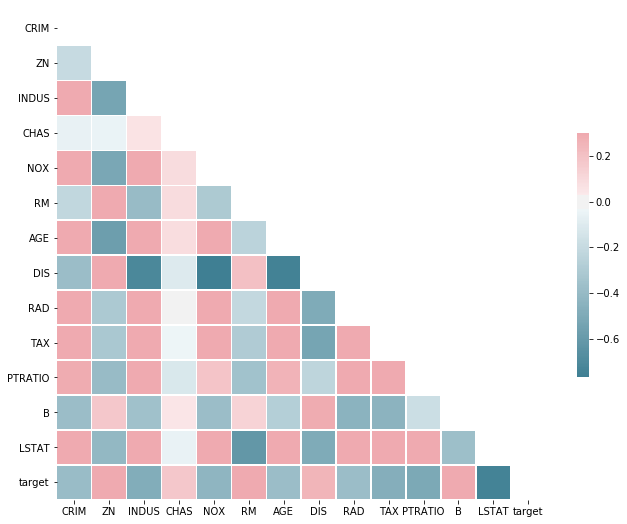

In [67]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Com essa matriz nos já podemos ter uma ideia de quais variáveis são mais interessantes do que outras.

Caso a gente fique com variáveis altamente correlacionadas podemos entrar em um problema de multicolinearidade. Quais variáveis podemos remover?


Depois nos dados que nós ainda não olhamos

In [68]:
Y = boston_data['target']
X = boston_data.drop('target', axis=1)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [70]:
#Usando a biblioteca statsmodels

X_train_4 = sm.add_constant(X_train) #adiciona a cte a base de dados
est3 = sm.OLS(Y_train, X_train_4)
est32 = est3.fit()
predictions = est32.predict(X_train_4) 
residuos = Y_train - predictions
print(est32.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.95e-92
Time:                        19:28:29   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6821      6.057      5.231      0.0

### Vamos remover variáveis correlacionadas

In [71]:
Y = boston_data['target']
X = boston_data.drop(['target', 'AGE', 'INDUS', 'NOX'], axis=1)

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [73]:
#Usando a biblioteca statsmodels

X_train_5 = sm.add_constant(X_train) #adiciona a cte a base de dados
est4 = sm.OLS(Y_train, X_train_5)
est42 = est4.fit()
predictions = est42.predict(X_train_5) 
residuos = Y_train - predictions
print(est42.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     94.40
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.62e-92
Time:                        19:28:29   Log-Likelihood:                -1060.5
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     343   BIC:                             2186.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8529      5.086      3.904      0.0

## Passo_6: Avaliar os residuos do modelo ajustado no passo 5

Text(0,0.5,'Residuo')

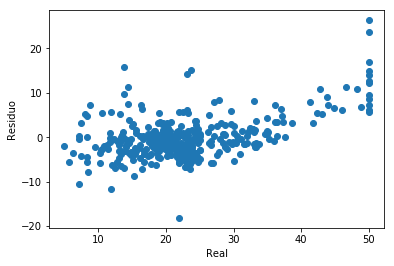

In [75]:
# plot dos residuos
plt.scatter(Y_train,residuos)
plt.xlabel("Real")
plt.ylabel("Residuo")

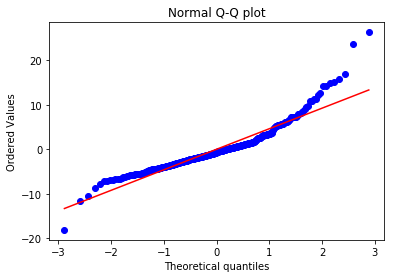

In [76]:
## qqplot dos resíduos
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## Outros desafios usando Regressão

 - [Kaggle: a first experience on Machine Learning and Regression Challenges](https://medium.com/@pramos/kaggle-a-first-experience-on-machine-learning-and-regression-challenges-446436901b7e)
 - [Predicting House Prices Playground Competition: Winning Kernels](http://blog.kaggle.com/2017/03/29/predicting-house-prices-playground-competition-winning-kernels/)